In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition


circles, perplexity=5 in 0.25 sec
circles, perplexity=15 in 0.33 sec
circles, perplexity=30 in 0.32 sec
circles, perplexity=50 in 0.35 sec
circles, perplexity=80 in 0.41 sec
circles, perplexity=100 in 0.39 sec
S-curve, perplexity=5 in 0.27 sec
S-curve, perplexity=15 in 0.29 sec
S-curve, perplexity=30 in 0.32 sec
S-curve, perplexity=50 in 0.39 sec
S-curve, perplexity=80 in 0.37 sec
S-curve, perplexity=100 in 0.36 sec
uniform grid, perplexity=5 in 0.36 sec
uniform grid, perplexity=15 in 0.38 sec
uniform grid, perplexity=30 in 0.5 sec
uniform grid, perplexity=50 in 0.45 sec
uniform grid, perplexity=80 in 0.4 sec
uniform grid, perplexity=100 in 0.41 sec


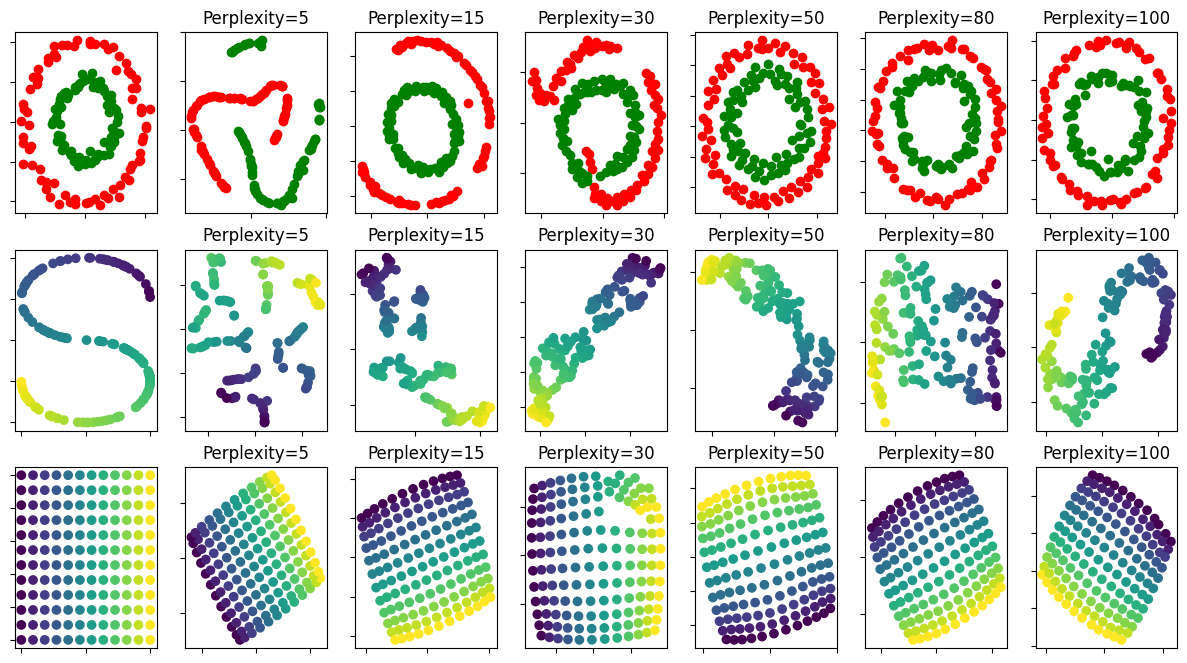

In [5]:
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 7, figsize=(15, 8))
perplexities = [5, 15, 30, 50, 80, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()

Tùy theo data, perplexity khác nhau đưa ra các kết quả sát với data ban đầu ở các mức độ khác nhau, thường thì perplexity cao tầm 50-100 đưa ra kết quả sát hơn
 

In [ ]:
# Dùng word embedding (https://habr.com/en/company/vk/blog/449984/), chọn ra 10 từ bất kì, với mỗi từ tìm 10 từ có embedding gần nhất
# nhận xét về ngữ nghĩa các từ có embedding gần nhau
# dùng t-SNE giảm chiều các vector embedding về 2 chiều, nhận xét các cụm

## 4
### PCA:
- It is a linear Dimensionality reduction technique.	
- It tries to preserve the global structure of the data.	
- It does not work well as compared to t-SNE.	
- It does not involve Hyperparameters.	
- It gets highly affected by outliers.	
### tSNE:
- It is a non-linear Dimensionality reduction technique.
- It tries to preserve the local structure(cluster) of data.
- It is one of the best dimensionality reduction technique.
- It involves Hyperparameters such as perplexity, learning rate and number of steps.
- It can handle outliers.